## This tutorial introduces XArray, a Python library for working with labeled multidimensional arrays.

#### In order to be able to use numpy we need to import the library using the special word `import`. Also, to avoid typing `numpy` every time we want to use one if its functions we can provide an alias using the special word `as`:

In [36]:
%matplotlib inline

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

#### Now, we have access to all the functions available in `numpy` by typing `np.name_of_function`. For example, the equivalent of `1 + 1` in Python can be done in `numpy`:

In [2]:
ds = xr.open_dataset('data/canberra_ls8.nc')

ds

<xarray.Dataset>
Dimensions:    (latitude: 320, longitude: 320, time: 2)
Coordinates:
  * time       (time) datetime64[ns] 2016-01-01 2017-01-01
  * latitude   (latitude) float64 -35.34 -35.34 -35.34 ... -35.26 -35.26 -35.26
  * longitude  (longitude) float64 149.1 149.1 149.1 149.1 ... 149.2 149.2 149.2
Data variables:
    crs        int32 ...
    blue       (time, latitude, longitude) float32 ...
    green      (time, latitude, longitude) float32 ...
    red        (time, latitude, longitude) float32 ...
    nir        (time, latitude, longitude) float32 ...
    swir1      (time, latitude, longitude) float32 ...
    swir2      (time, latitude, longitude) float32 ...
Attributes:
    date_created:           2019-10-18T11:27:53.613700
    Conventions:            CF-1.6, ACDD-1.3
    history:                NetCDF-CF file created by datacube version '1.7+1...
    geospatial_bounds:      POLYGON ((149.08 -35.34,149.08 -35.26,149.16 -35....
    geospatial_bounds_crs:  EPSG:4326
    geospat

#### This figure, from the documentation page is quite ilustrative:

<img src="data/dataset-diagram.png" alt="drawing" width="600" align="left"/>

#### A `Dataset` can be seen as a dictionary structure packing up the data, dimensions and attributes.

#### Variables in a `Dataset` object are called `DataArrays` and they share dimensions with the higher level `Dataset`

##### To access a variable we can access as if it were a Python dictionary, or using the `.` notation, which is more convenient.

In [3]:
ds["green"]

#or alternatively 

ds.green

<xarray.DataArray 'green' (time: 2, latitude: 320, longitude: 320)>
[204800 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2016-01-01 2017-01-01
  * latitude   (latitude) float64 -35.34 -35.34 -35.34 ... -35.26 -35.26 -35.26
  * longitude  (longitude) float64 149.1 149.1 149.1 149.1 ... 149.2 149.2 149.2
Attributes:
    grid_mapping:  crs
    units:         1

#### Dimensions are also stored as numeric arrays

In [12]:
ds['time']

#or alternatively 

ds.time

<xarray.DataArray 'time' (time: 2)>
array(['2016-01-01T00:00:00.000000000', '2017-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 2017-01-01
Attributes:
    standard_name:  time
    long_name:      Time, unix time-stamp
    axis:           T

#### Attributes are internally stored under `.attrs`, but the same convenient `.` notation applies to them.

In [18]:
ds.attrs['Conventions']

#or alternatively 

ds.Conventions

'CF-1.6, ACDD-1.3'

#### DataArrays store their data internally as multidimensional numpy arrays. But these arrays contain dimensions or labels that make it easier handle the data. To access the underlaying numpy array of a `DataArray` we can use the `.data` notation.

In [21]:
arr = ds.green.data

print(type(arr), arr.shape)

ds.green

<class 'numpy.ndarray'> (2, 320, 320)


<xarray.DataArray 'green' (time: 2, latitude: 320, longitude: 320)>
array([[[882., 911., ..., 925., 954.],
        [764., 872., ..., 969., 930.],
        ...,
        [591., 650., ..., 865., 521.],
        [582., 549., ..., 702., 456.]],

       [[839., 861., ..., 868., 960.],
        [699., 813., ..., 900., 905.],
        ...,
        [625., 644., ..., 888., 546.],
        [554., 557., ..., 733., 436.]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2016-01-01 2017-01-01
  * latitude   (latitude) float64 -35.34 -35.34 -35.34 ... -35.26 -35.26 -35.26
  * longitude  (longitude) float64 149.1 149.1 149.1 149.1 ... 149.2 149.2 149.2
Attributes:
    grid_mapping:  crs
    units:         1

#### XArray offers two different ways of selecting data:
* `isel()`: For selecting data based on its index (like numpy).
* `sel()`: For selecting data based on its dimension of label value.

In [25]:
ss = ds.green.isel(time=0)

ss

<xarray.DataArray 'green' (latitude: 320, longitude: 320)>
array([[882., 911., 865., ..., 936., 925., 954.],
       [764., 872., 898., ..., 969., 969., 930.],
       [832., 897., 897., ..., 988., 901., 901.],
       ...,
       [618., 619., 607., ..., 966., 966., 965.],
       [591., 650., 708., ..., 895., 865., 521.],
       [582., 549., 549., ..., 889., 702., 456.]], dtype=float32)
Coordinates:
    time       datetime64[ns] 2016-01-01
  * latitude   (latitude) float64 -35.34 -35.34 -35.34 ... -35.26 -35.26 -35.26
  * longitude  (longitude) float64 149.1 149.1 149.1 149.1 ... 149.2 149.2 149.2
Attributes:
    grid_mapping:  crs
    units:         1

In [26]:
ss = ds.green.sel(time=datetime(2016,1,1))

ss

<xarray.DataArray 'green' (latitude: 320, longitude: 320)>
array([[882., 911., 865., ..., 936., 925., 954.],
       [764., 872., 898., ..., 969., 969., 930.],
       [832., 897., 897., ..., 988., 901., 901.],
       ...,
       [618., 619., 607., ..., 966., 966., 965.],
       [591., 650., 708., ..., 895., 865., 521.],
       [582., 549., 549., ..., 889., 702., 456.]], dtype=float32)
Coordinates:
    time       datetime64[ns] 2016-01-01
  * latitude   (latitude) float64 -35.34 -35.34 -35.34 ... -35.26 -35.26 -35.26
  * longitude  (longitude) float64 149.1 149.1 149.1 149.1 ... 149.2 149.2 149.2
Attributes:
    grid_mapping:  crs
    units:         1

In [29]:
ss = ds.green.sel(time=datetime(2016,1,1), latitude=slice(-35.30,-35.24))

ss

<xarray.DataArray 'green' (latitude: 160, longitude: 320)>
array([[313., 313., 305., ..., 575., 413., 422.],
       [317., 316., 311., ..., 621., 476., 414.],
       [314., 318., 316., ..., 492., 492., 367.],
       ...,
       [618., 619., 607., ..., 966., 966., 965.],
       [591., 650., 708., ..., 895., 865., 521.],
       [582., 549., 549., ..., 889., 702., 456.]], dtype=float32)
Coordinates:
    time       datetime64[ns] 2016-01-01
  * latitude   (latitude) float64 -35.3 -35.3 -35.3 ... -35.26 -35.26 -35.26
  * longitude  (longitude) float64 149.1 149.1 149.1 149.1 ... 149.2 149.2 149.2
Attributes:
    grid_mapping:  crs
    units:         1

#### Xarray exposes lots of functions to easily transform and analyse `Datasets` and `DataArrays`. For example to calculate the spatial mean of the green band 

In [32]:
print("Mean of green band:", ds.green.mean())
print("Standard deviation of green band:", ds.green.std())
print("Sum of green band:", ds.green.sum())

Mean of green band: <xarray.DataArray 'green' ()>
array(692.3445, dtype=float32)
Standard deviation of green band: <xarray.DataArray 'green' ()>
array(313.62076, dtype=float32)
Sum of green band: <xarray.DataArray 'green' ()>
array(1.417921e+08, dtype=float32)


#### Plotting is also conveniently integrated in the library.

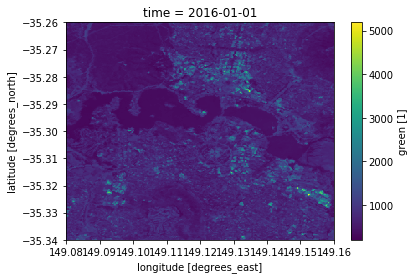

In [9]:
ds["green"].isel(time=0).plot()

#### But sometimes is easier to do things manually with numpy and matplotlib

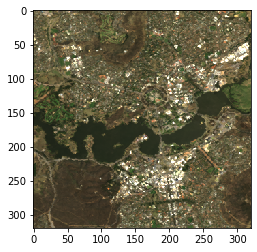

In [43]:
rgb = np.dstack((ds.red.isel(time=0).data, ds.green.isel(time=0).data, ds.blue.isel(time=0).data)) / 2000
rgb = np.clip(rgb, 0, 1)

plt.imshow(rgb)

In [5]:
ds.green.mean()

<xarray.DataArray 'green' ()>
array(692.3445, dtype=float32)

#### The core concept in numpy is the `array` which is equivalent to lists of numbers but can be multidimensional. To declare a numpy array we do:

In [7]:
np.array([1,2,3,4,5,6,7,8,9])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

#### Most of the functions and operations defined in numpy can be applied to arrays. For example, with the previous operation:

In [8]:
arr1 = np.array([1,2,3,4])
arr2 = np.array([3,4,5,6])

np.add(arr1, arr2)

array([ 4,  6,  8, 10])

#### But a more simple and convenient notation can also be used:

In [9]:
arr1 + arr2

array([ 4,  6,  8, 10])

#### Arrays can be sliced and diced. We can get subsets of the arrays using the indexing notation which is `[start:end:stride]`. Let's see what this means:

In [40]:
arr = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

print(arr[5])
print(arr[5:])
print(arr[:5])
print(arr[::2])

5
[ 5  6  7  8  9 10 11 12 13 14 15]
[0 1 2 3 4]
[ 0  2  4  6  8 10 12 14]


##### Experiment playing with the indexes to understand the meaning of start, end and stride. What happend if you don't specify a start? What value numpy uses instead? Note that numpy indexes start on `0`, the same convention used in Python lists.

#### Indexes can also be negative, meaning that you start counting by the end. For example, to select the last 2 elements in an array we can do:

In [42]:
arr[-2:]

array([14, 15])

#### Can you figure out how an easy way of selecting all the elements in the previous array excluding the last one, [15]?

#### Numpy arrays can have multiple dimensions. For example, to define a `column` array: 

In [33]:
np.array([[1,2,3,4,5,6,7,8,9]])

array([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

#### To visualise the shape or dimensions of a numpy array we can add the suffix `.shape`

In [10]:
print(np.array([1,2,3,4,5,6,7,8,9]).shape)
print(np.array([[1,2,3,4,5,6,7,8,9]]).shape)
print(np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9]]).shape)

(9,)
(1, 9)
(9, 1)


#### Any array can be reshaped into different shapes using the function `reshape`:

In [ ]:
np.array([1,2,3,4,5,6,7,8]).reshape((2,4))

#### If you are concerned about having to type so many squared brackets, there are more simple and convenient ways of doing the same:

In [11]:
print(np.array([1,2,3,4,5,6,7,8,9]).reshape(1,9).shape)
print(np.array([1,2,3,4,5,6,7,8,9]).reshape(9,1).shape)
print(np.array([1,2,3,4,5,6,7,8,9]).reshape(3,3).shape)

(1, 9)
(9, 1)
(3, 3)


#### Also there are shortcuts for declaring common arrays without having to type all their elements:

In [13]:
print(np.arange(9))
print(np.ones((3,3)))
print(np.zeros((2,2,2)))

[0 1 2 3 4 5 6 7 8]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]


#### Can you try to declare a 3-dimensional array of shape (5,3,3)? Assign it to a variable

#### Create another one with the same shape and use the numpy function to add both arrays:

## This second part introduces matplotlib, a Python library for plotting numpy arrays as images.

#### For the purposes of this tutorial we are going to use a part of matplotlib called pyplot. We import it by doing:

In [15]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

#### An image can be seen as a 2-dimensional array. To visualise the contents of a numpy array:

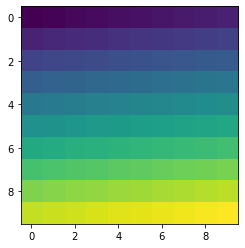

In [16]:
plt.imshow(np.arange(100).reshape(10,10))

Can you create a similar image with an array with shape (50,50)?

#### We can use the Pyplot library to load an image using the function `imread`

In [35]:
im = plt.imread('data/BM_Fire.jpg')

#### This image is a 3-dimensional numpy array. By convention the first dimension corresponds to the vertical axis, the second to the horizontal axis and the third are the Red, Green and Blue channels of the image.

In [37]:
im.shape

(2448, 3264, 3)

##### Let's display this image using the `imshow` function. What are the dimensions of the `im` array? 

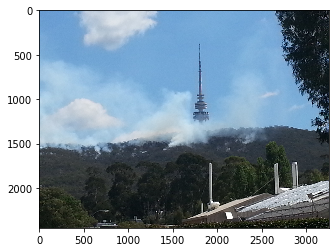

In [36]:
plt.imshow(im)

##### This is a photo of Black Mountain taken during prescribed burns in 2014. A colour image is normally composed of three layers containing the values of the red, green and blue pixels. When we display an image we see all three colours combined.

#### Knowing the extents of the image given by its shape, can you display the values of one of the pixels in the sky? You need to provide one index for each x and y dimensions and get all three channels. Make sure the values represent a mostly blue pixel.

#### Let's use the indexing functionality of numpy to select a slice of this image. For example to select the top right corner:

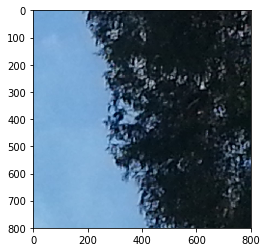

In [44]:
plt.imshow(im[:800,-800:,:])

#### Let's practice your indexing skills! Can you create a cropped image around Black Mountain's tower? Remember: first dimension is the vertical coordinates, second dimension is the horizontal coordinates and the third are the RGB channels of the image.

#### Let's play around with this a little bit. For example, let's replace all the values in the 'red' layer with the value 255, this is the highest red value possible and it will make your whole image redish. The following command will replace all the values in the red channel (axis 3) with the value 255, and see what happens

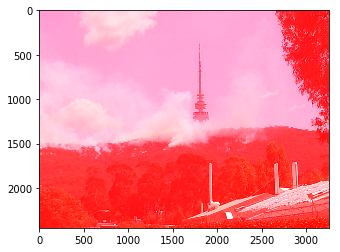

In [45]:
#Don't worry about this for the moment:
im.setflags(write=1)

im[:,:,0] = 255
plt.imshow(im)